In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import contourpy
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as colors
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from _FigureJiazeHelper import *
from _DetectabilityWithMeta import *
from _CommunityDetect import *
from EXPERIMENT_MINORITY import *
from scipy.optimize import linear_sum_assignment

%load_ext autoreload
%autoreload 2

In [3]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=10)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 10  # 'large'
plt.rcParams['lines.markersize'] = 12
plt.rcParams['axes.linewidth'] = 0.5

# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

q=[1. 2. 3. 4. 5. 6. 7.], min_f=[-1.47935, -1.55526, -1.62168, -1.63588, -1.6365, -1.63734, -1.63656],
diff_min_f=[-0.07591, -0.06642, -0.0142, -0.00062, -0.00084, 0.00078]
Confusion Matrix of Final Partition:
 332.  146.  107.   93.
 352.  129.  128.  118.
 110. 1365.   42.   24.
 141.   41. 1315.   27.
 174.   38.   38. 1243.


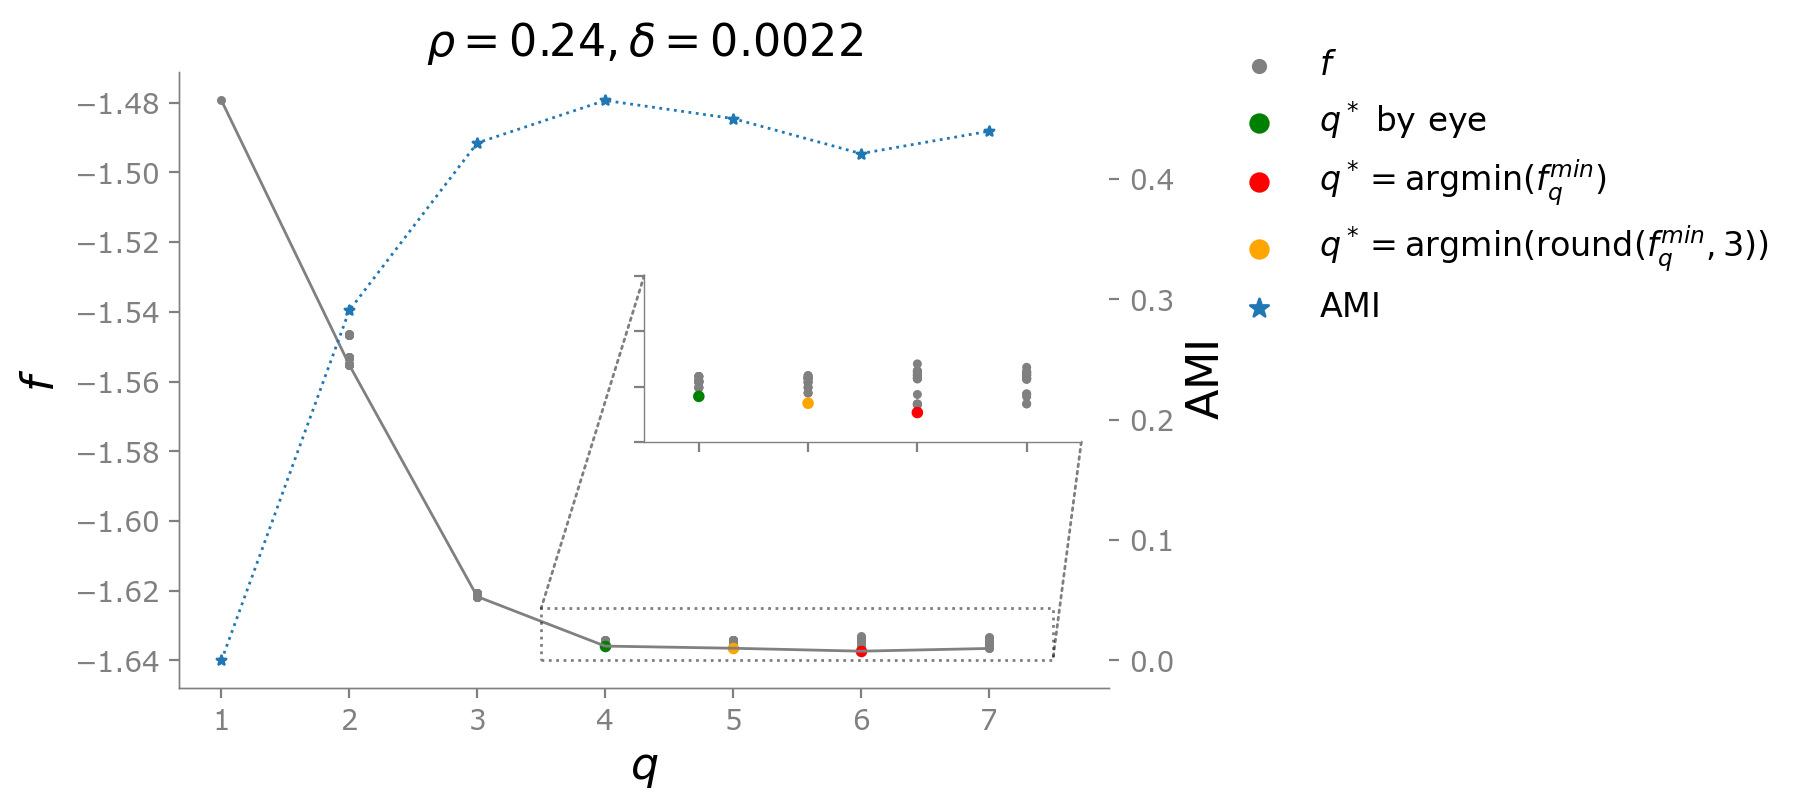

In [8]:
rho = 0.24
delta = 0.0022
fileName = "6.17_2ndType_multiInitBH_n=6000d=5Zs=2Zb=3rho=0.24delta=0.0022t=0_BPlearnq_FreeEnergy_998245_inite0.2.txt"
filepath = "./result/test_record_f/" + fileName
# observe_f("./result/test_record_f/" + fileName, fileName, rho=0.24, delta=0.0022, fig=fig, ax=ax)
results = []
with open(filepath, 'r') as fr:
    for line in fr.readlines():
        line = line.strip().split(" ")
        if line[0] == 'Finial':
            break
        result_line = []
        for datastr in line:
            # print(datastr)
            result_line.append(float(datastr.split("=")[1]))
        results.append(result_line)
results = np.array(results)

fig = plt.figure(figsize=(6, 4))
widths = [4]
heights = [3]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
ax1 = ax.scatter(results[:, 0], results[:, 2], s=5, color="gray", label=r"$f$")
x = np.sort(np.unique(results[:, 0]))
y = []
for xi in x:
    y.append(np.min(results[np.argwhere(results[:, 0]==xi)[:, 0], :][:, 3]))
print(f'q={x}, min_f={y},\ndiff_min_f={[np.around(y[i+1] - y[i], 5) for i in range(len(y)-1)]}')
ax.plot(x, y, '-', lw=1, color='gray')
ax.set_xlabel(r"$q$", fontsize=16)
ax.set_ylabel(r"$f$", fontsize=16)
# fileName = filepath.split('/')[4]
ax.set_title(rf'$\rho={rho}, \delta={delta}$', fontsize=16)

cm_file = f'./result/confusionMatrix/{fileName.split("_BPlearnq_FreeEnergy_")[0]}.txt'
print('Confusion Matrix of Final Partition:')
with open(cm_file, 'r') as fr:
    for line in fr.readlines():
        line = line.strip().replace('[', '').replace(']', '')
        print(line)


ax2 = ax.scatter(4, -1.63588, s=10, color='green', label=r'$q^*$ by eye')
ax3 = ax.scatter(6, -1.63734, s=10, color='red', label=r'$q^*=\mathrm{argmin}(f_q^{min})$ ')
ax4 = ax.scatter(5, -1.6365, s=10, color='orange', label=r'$q^*=\mathrm{argmin}(\mathrm{round}(f_q^{min}, 3))$ ')
# lgd = plt.legend(loc=2, bbox_to_anchor=(1.15, 1.0), fontsize=10, markerscale=2)

x1, x2, y1, y2 = 3.5, 7.5, -1.64, -1.625  # subregion of the original image
axins = ax.inset_axes(
    [0.5, 0.4, 0.47, 0.27],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
sub_points_x = []
sub_points_y = []
sub_points_c = []
sub_points_s = []
for r in range(np.shape(results)[0]):
    if x1 < results[r, 0] < x2:
        sub_points_x.append(results[r, 0])
        sub_points_y.append(results[r, 2])
        sub_points_c.append('gray')
        sub_points_s.append(5)

sub_points_x.append(4)
sub_points_y.append(-1.63588)
sub_points_c.append('green')
sub_points_s.append(10)

sub_points_x.append(5)
sub_points_y.append(-1.6365)
sub_points_c.append('orange')
sub_points_s.append(10)

sub_points_x.append(6)
sub_points_y.append(-1.63734)
sub_points_c.append('red')
sub_points_s.append(10)
axins.scatter(sub_points_x, sub_points_y, s=sub_points_s, c=sub_points_c)
axins.set_xticks([4, 5, 6, 7])
# axins.axhline(0, color='grey', lw=1, ls=':')
_, connectionpath = ax.indicate_inset_zoom(axins, edgecolor="black", ls=':')
for p in connectionpath:
    p.set(linestyle=':')
ax.set_xticks(x)

ax_twin = ax.twinx()
xs = [1, 2, 3, 4, 5, 6, 7]
amis = [0]
for q in [2, 3, 4, 5, 6, 7]:
    cm_file = f'./result/confusionMatrix/6.17_2ndType_multiInitBH_n=6000d=5Zs=2Zb=3rho=0.24delta=0.0022t=0_q={q}.txt'
    with open(cm_file, 'r') as fr:
        for line in fr.readlines():
            if '[' in line or ']' in line:
                continue
            else:
                amis.append(float(line.strip()))
ax5 = ax_twin.scatter(xs, amis, s=12, marker='*', label=r'$\rm AMI$')
ax_twin.plot(xs, amis, ':', linewidth=1)
ax_twin.set_ylabel(r'$\rm AMI$', fontsize=16)
axs = [ax1,ax2,ax3,ax4,ax5]
lables = [a.get_label() for a in axs]
ax.legend(axs, lables, loc=2, bbox_to_anchor=(1.15, 1.0),  fontsize=12, markerscale=2, frameon=False, borderaxespad=-1.1)
# lgd = fig.legend(handels, [r"$f$", r'$q^*$ by eye', r'$q^*=\mathrm{argmin}(f_q^{min})$ ', r'$q^*=\mathrm{argmin}(\mathrm{round}(f_q^{min}, 3))$ ',
#                           r'$AMI$'], 
#            loc=2, bbox_to_anchor=(1.15, 1.0),  fontsize=12, markerscale=2, frameon=True)
# save_path = "./_Figure/Minority/" + f"FigureMinorityBPf_rho{rho}delta{delta}_v1.pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

q=[1. 2. 3. 4. 5. 6. 7.], min_f=[-1.47935, -1.55526, -1.62168, -1.63588, -1.6365, -1.63734, -1.63656],
diff_min_f=[-0.07591, -0.06642, -0.0142, -0.00062, -0.00084, 0.00078]


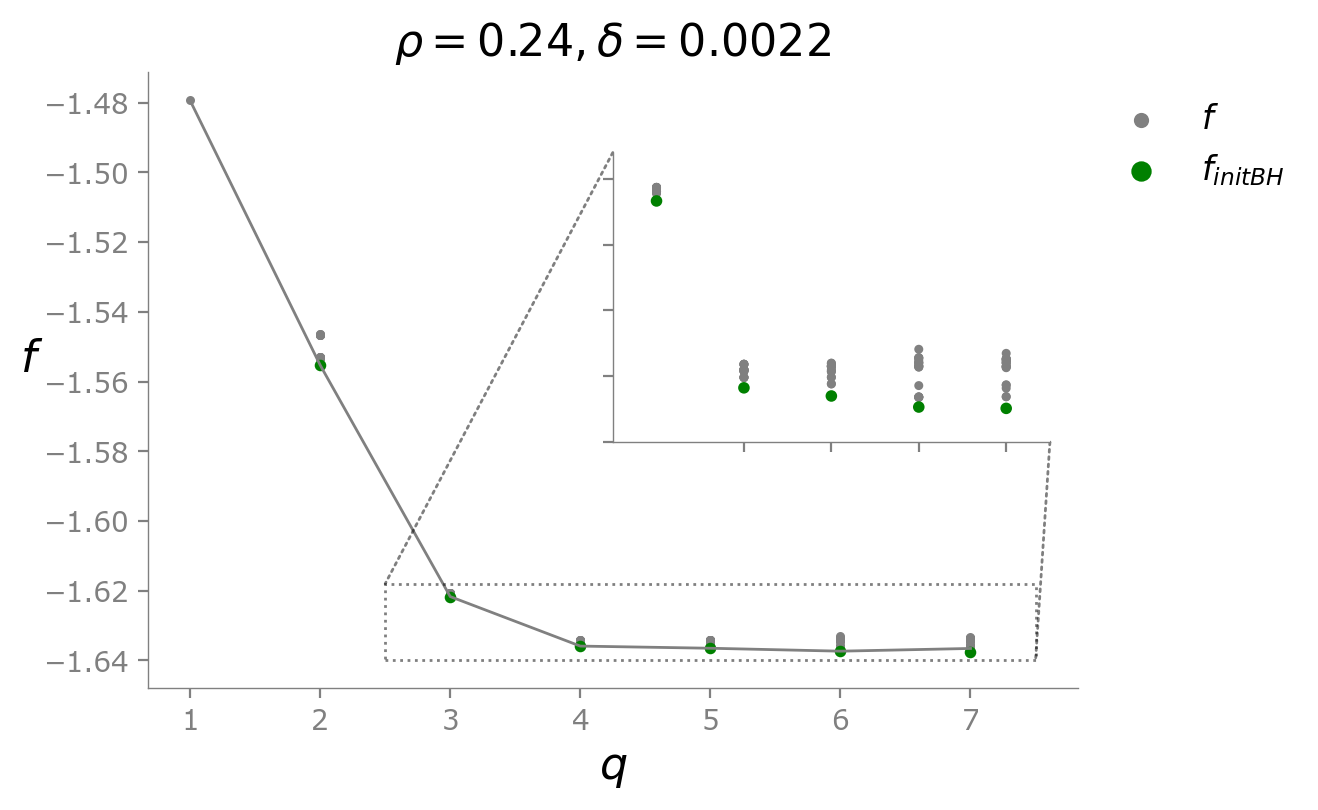

In [10]:
rho = 0.24
delta = 0.0022
fileName = "6.17_2ndType_multiInitBH_n=6000d=5Zs=2Zb=3rho=0.24delta=0.0022t=0_BPlearnq_FreeEnergy_998245_inite0.2.txt"
filepath = "./result/test_record_f/" + fileName
# observe_f("./result/test_record_f/" + fileName, fileName, rho=0.24, delta=0.0022, fig=fig, ax=ax)
BPresults = []
BPinitBHresults = []
with open(filepath, 'r') as fr:
    start_BPinitBH = False
    for line in fr.readlines():
        line = line.strip().split(" ")
        if line[0] == 'Finial':
            start_BPinitBH = True
            continue
        else:
            if start_BPinitBH is False:
                result_line = []
                for datastr in line:
                    # print(datastr)
                    result_line.append(float(datastr.split("=")[1]))
                BPresults.append(result_line)
            else:
                result_line = []
                for datastr in line:
                    # print(datastr)
                    result_line.append(float(datastr.split("=")[1]))
                BPinitBHresults.append(result_line)
                
BPresults = np.array(BPresults)
BPinitBHresults = np.array(BPinitBHresults)

fig = plt.figure(figsize=(6, 4))
widths = [4]
heights = [3]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
ax1 = ax.scatter(BPresults[:, 0], BPresults[:, 2], s=5, color="gray", label=r"$f$")
x = np.sort(np.unique(BPresults[:, 0]))
y = []
for xi in x:
    y.append(np.min(BPresults[np.argwhere(BPresults[:, 0]==xi)[:, 0], :][:, 3]))
print(f'q={x}, min_f={y},\ndiff_min_f={[np.around(y[i+1] - y[i], 5) for i in range(len(y)-1)]}')
ax.plot(x, y, '-', lw=1, color='gray')
ax.set_xlabel(r"$q$", fontsize=16)
ax.set_ylabel(r"$f$", fontsize=16, rotation='horizontal')
# fileName = filepath.split('/')[4]
ax.set_title(rf'$\rho={rho}, \delta={delta}$', fontsize=16)
ax2 = ax.scatter(BPinitBHresults[:, 0], BPinitBHresults[:, 1], s=10, color='green', label=r'$f_{initBH}$')

axs = [ax1, ax2]
lables = [a.get_label() for a in axs]
lgd = ax.legend(axs, lables, loc=2, bbox_to_anchor=(1, 1.0),  fontsize=12, markerscale=2, frameon=False)

x1, x2, y1, y2 = 2.5, 7.5, -1.64, -1.618  # subregion of the original image
axins = ax.inset_axes(
    [0.5, 0.4, 0.47, 0.47],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
sub_points_x = []
sub_points_y = []
sub_points_c = []
sub_points_s = []
for r in range(np.shape(BPresults)[0]):
    if x1 < BPresults[r, 0] < x2:
        sub_points_x.append(BPresults[r, 0])
        sub_points_y.append(BPresults[r, 2])
        sub_points_c.append('gray')
        sub_points_s.append(5)

for r in range(np.shape(BPinitBHresults)[0]):
    if x1 < BPinitBHresults[r, 0] < x2:
        sub_points_x.append(BPinitBHresults[r, 0])
        sub_points_y.append(BPinitBHresults[r, 1])
        sub_points_c.append('green')
        sub_points_s.append(10)
axins.scatter(sub_points_x, sub_points_y, s=sub_points_s, c=sub_points_c)
axins.set_xticks([4, 5, 6, 7])
# axins.axhline(0, color='grey', lw=1, ls=':')
_, connectionpath = ax.indicate_inset_zoom(axins, edgecolor="black", ls=':')
for p in connectionpath:
    p.set(linestyle=':')
ax.set_xticks(x)

# save_path = "./_Figure/Minority/" + f"FigureMinorityBPinitBH_f_rho{rho}delta{delta}_v1.pdf"
# # plt.tight_layout()
# plt.savefig(save_path, dpi=600, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [26]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [40]:
def plot_cm(confusionMatrix, fig=None, ax=None, yticks=True):
    subTrueNumgroup,subBHNumgroup = np.shape(confusionMatrix)
    rowsum = np.sum(confusionMatrix, axis=1)
    rowsum = rowsum.reshape(-1, 1)
    rowsum = np.repeat(rowsum, subBHNumgroup, axis=1)
    normConfusionMatrix = np.round(confusionMatrix / rowsum, 2)
    if fig is None and ax is None:
        fig = plt.figure(figsize=(3, 3))
        widths = [4]
        heights = [4]
        spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
        row = 0
        col = 0
        ax = fig.add_subplot(spec5[row, col])
#     cmap = mpl.colormaps["bwr_r"]
#     cmap = mpl.colormaps["RdYlBu"]
    cmap = mpl.colormaps["seismic_r"]
    cmap = truncate_colormap(cmap, 0.3, 0.7)
    im = ax.matshow(normConfusionMatrix, cmap=cmap, vmin=0, vmax=1)
    for i in range(subTrueNumgroup):
        for j in range(subBHNumgroup):
            c = normConfusionMatrix[i,j]
            ax.text(j, i, str(c), va='center', ha='center', fontsize=16)
#     ax.set_title(rf"$\rho={rho}, \delta={delta}$", fontsize=12)
    # ax.set_ylabel("True Community", rotation='horizontal', fontsize=20)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10) if yticks else ax.set_yticks([])
    return im

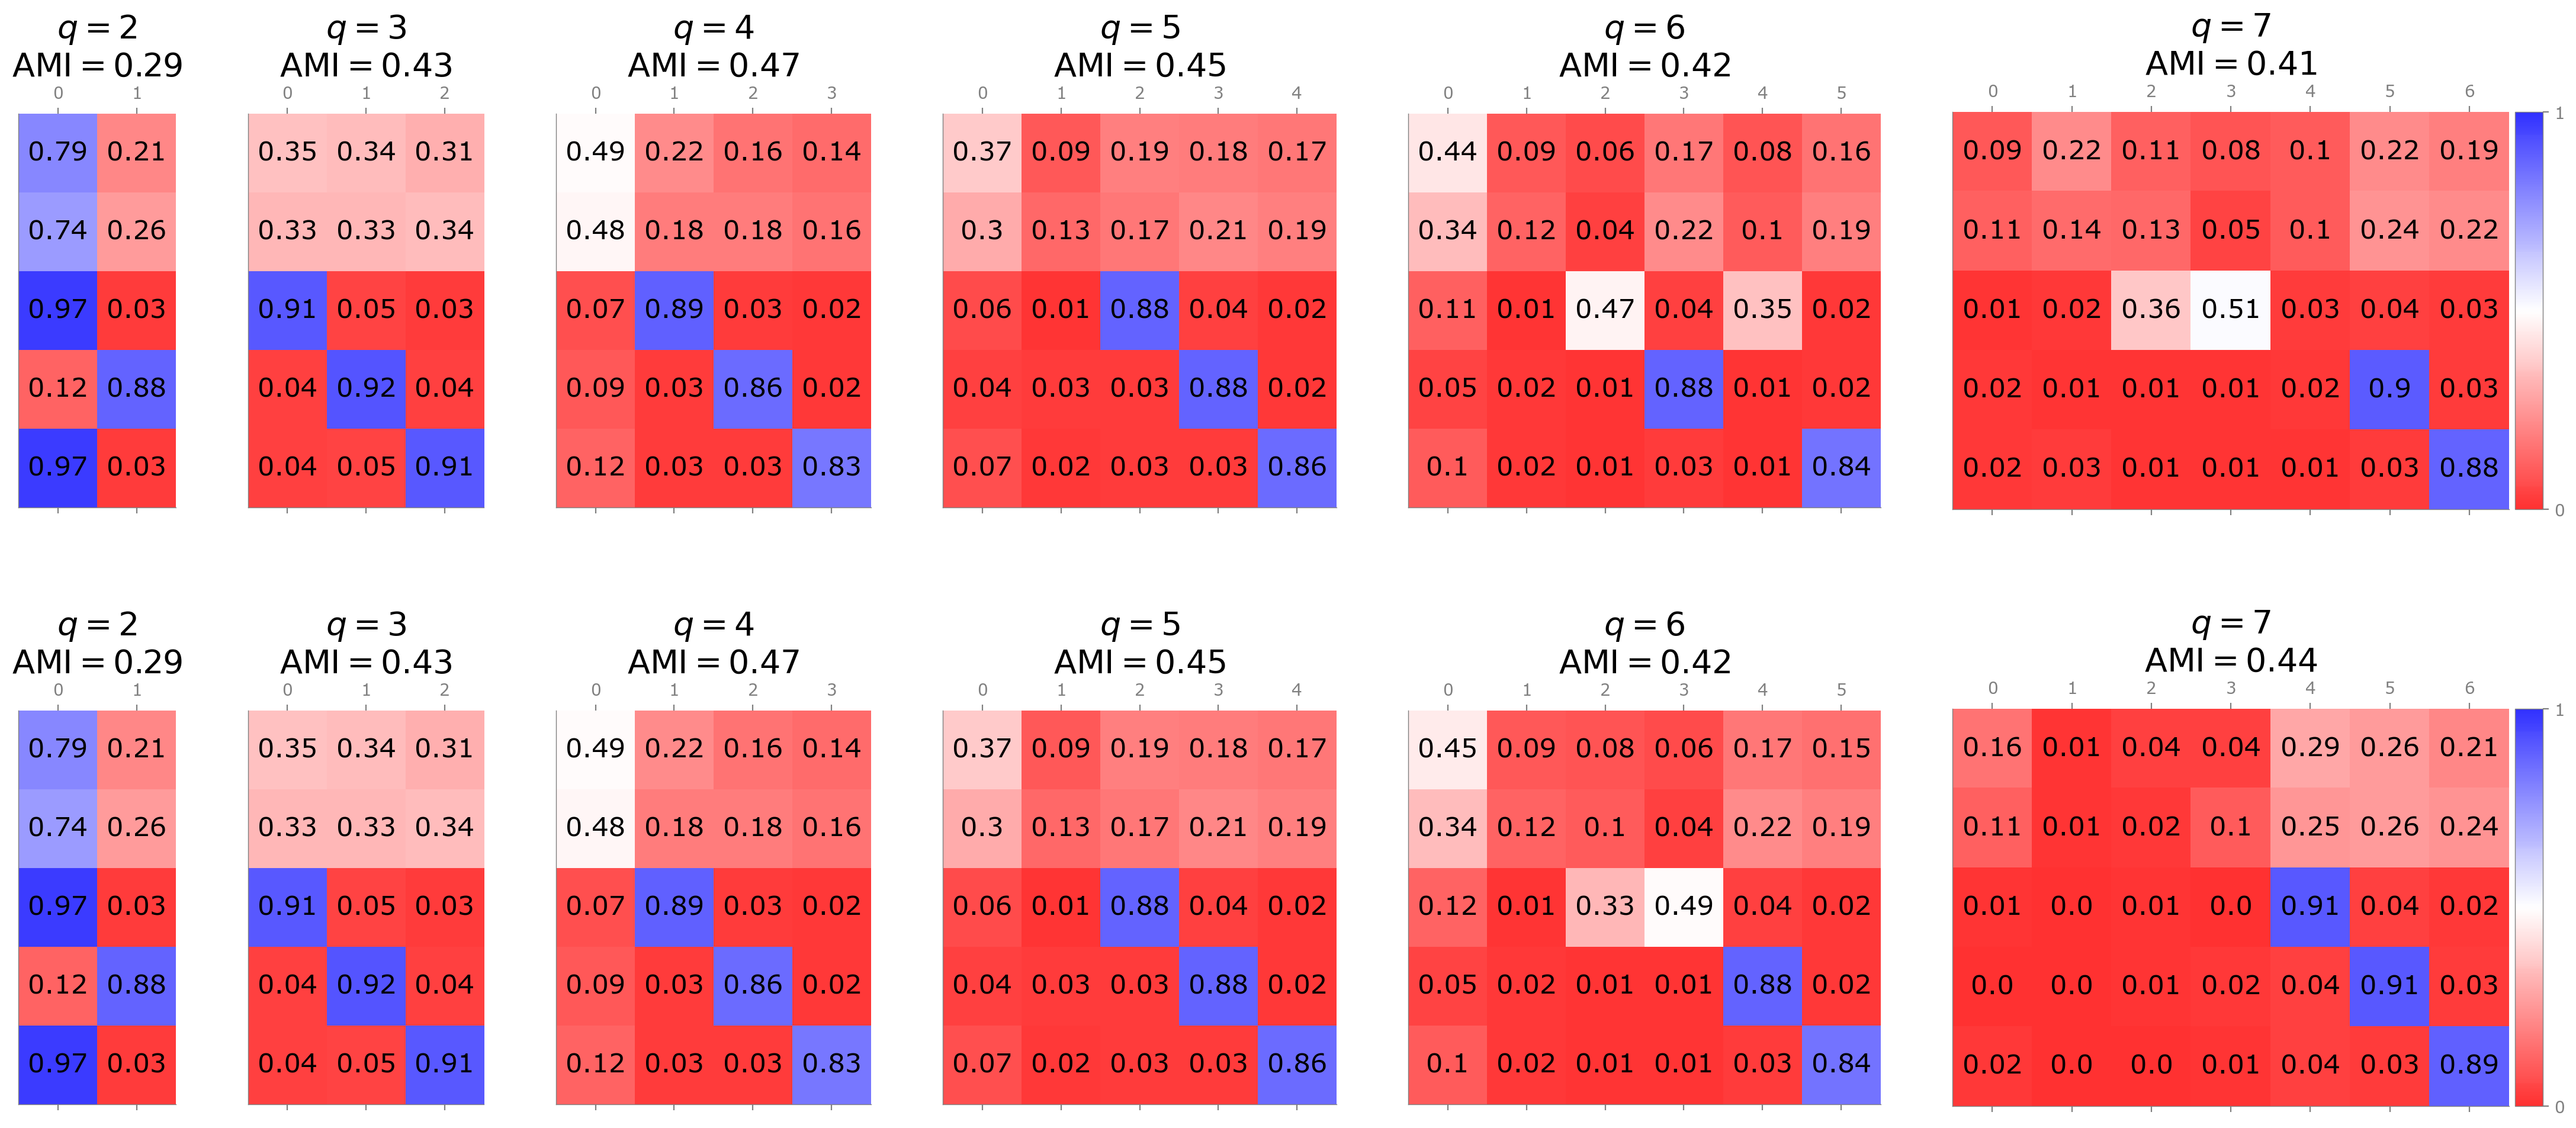

In [49]:
fig = plt.figure(figsize=(27.5, 12))
widths = [2, 3, 4, 5, 6, 7.5]
heights = [6, 6]
spec5 = fig.add_gridspec(ncols=6, nrows=2, width_ratios=widths, height_ratios=heights)

for q in [2, 3, 4, 5, 6, 7]:
    cm_file = f'./result/confusionMatrix/6.17_2ndType_multiInitBH_n=6000d=5Zs=2Zb=3rho=0.24delta=0.0022t=0_initBH_q={q}.txt'
#     print(f'Confusion Matrix & AMI of BP init with BH Partition(q={q}):')
    with open(cm_file, 'r') as fr:
        cm_list = []
        ami = 0
        for line in fr.readlines():
            if "[" in line or ']' in line:
                cm_str = line.strip().replace('[', '').replace(']', '').strip().split()
#                 print(cm_str)
                cm_list.append([float(x) for x in cm_str])
            else:
                ami = np.round(float(line.strip()), 2)
        cm = np.array(cm_list)
#         print(cm)
        row = 0
        col = q-2
        ax = fig.add_subplot(spec5[row, col])
        im = plot_cm(confusionMatrix=cm, fig=fig, ax=ax, yticks=False)
        title = '\n'.join([rf"$q={q}$", rf"$\rm AMI={ami}$"])
        ax.set_title(title, fontsize=20)
        if q == 7:
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            # cticks = [0, 0.25, 0.5, 0.75, 1]
            cticks = [0, 1]
            clabels = ["0", "1"]
            cbar = fig.colorbar(im, cax=cax, ticks=cticks)
            cbar.ax.tick_params(labelsize=10)
            cbar.ax.set_yticklabels(clabels)

    cm_file = f'./result/confusionMatrix/6.17_2ndType_multiInitBH_n=6000d=5Zs=2Zb=3rho=0.24delta=0.0022t=0_q={q}.txt'
#     print(f'Confusion Matrix & AMI of BP Partition with q={q}')
    with open(cm_file, 'r') as fr:
        cm_list = []
        ami = 0
        for line in fr.readlines():
            if "[" in line or ']' in line:
                cm_str = line.strip().replace('[', '').replace(']', '').strip().split()
                cm_list.append([float(x) for x in cm_str])
            else:
                ami = np.round(float(line.strip()), 2)
        cm = np.array(cm_list)
        row = 1
        col = q-2
        ax = fig.add_subplot(spec5[row, col])
        im = plot_cm(confusionMatrix=cm, fig=fig, ax=ax, yticks=False)
        title = '\n'.join([rf"$q={q}$", rf"$\rm AMI={ami}$"])
        ax.set_title(title, fontsize=20)
        if q == 7:
            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)
            # cticks = [0, 0.25, 0.5, 0.75, 1]
            cticks = [0, 1]
            clabels = ["0", "1"]
            cbar = fig.colorbar(im, cax=cax, ticks=cticks)
            cbar.ax.tick_params(labelsize=10)
            cbar.ax.set_yticklabels(clabels)
# plt.subplots_adjust(hspace=0.5)
save_path = "./_Figure/Minority/" + "FigureMinorityCM_" + f'BPBHsamed_rho{rho}delta{delta}' + ".pdf"
# plt.tight_layout()
plt.savefig(save_path, dpi=600)